In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

C:\Users\My Pc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
pwd()

'C:\\Users\\My Pc\\Desktop\\case'

In [2]:
cd C://Users//My Pc//Desktop//case    

C:\Users\My Pc\Desktop\case


In [69]:
file = 'Tweets.csv'
data = pd.read_csv(file)

In [134]:
 data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new,tokens
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what said,"[what, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you have added commercials to the experi...,"[plus, you, have, added, commercials, to, the,..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),i did not today must mean i need to take a...,"[i, did, not, today, must, mean, i, need, to, ..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it is really aggressive to blast obnoxious ""e...","[it, is, really, aggressive, to, blast, obnoxi..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it is a really big bad thing abou...,"[and, it, is, a, really, big, bad, thing, abou..."
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,seriously would pay 30 a flight for seats th...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),seriously would pay 30 a flight for seats th...,"[seriously, would, pay, 30, a, flight, for, se..."
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"yes, nearly every time i fly vx this ear wor...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),"yes, nearly every time i fly vx this ear wor...","[yes, ,, nearly, every, time, i, fly, vx, this..."
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,really missed a prime opportunity for men wit...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),really missed a prime opportunity for men wit...,"[really, missed, a, prime, opportunity, for, m..."
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"well, i didn't but now i do! d",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),"well, i did not but now i do!...","[well, ,, i, did, not, but, now, i, do, !, d]"
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"it was amazing, and arrived an hour early yo...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),"it was amazing, and arrived an hour early yo...","[it, was, amazing, ,, and, arrived, an, hour, ..."


In [82]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
new                              object
dtype: object

In [85]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [83]:
data.groupby("airline_sentiment").count()


,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new
airline_sentiment,,,,,,,,,,,,,,,
negative,9178,9178,9178,9178,9178,32,9178,32,9178,9178,663,9178,6036,6008,9178
neutral,3099,3099,0,1014,3099,3,3099,0,3099,3099,181,3099,2137,2128,3099
positive,2363,2363,0,330,2363,5,2363,0,2363,2363,175,2363,1734,1684,2363


In [70]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [71]:
data = standardize_text(data, "text")


In [72]:
data['text'].head(50)


0                                           what  said 
1      plus you've added commercials to the experien...
2      i didn't today    must mean i need to take an...
3      it's really aggressive to blast obnoxious "en...
4              and it's a really big bad thing about it
5      seriously would pay  30 a flight for seats th...
6      yes, nearly every time i fly vx this  ear wor...
7      really missed a prime opportunity for men wit...
8                      well, i didn't but now i do!   d
9      it was amazing, and arrived an hour early  yo...
10     did you know that suicide is the second leadi...
11     i  lt 3 pretty graphics  so much better than ...
12     this is such a great deal! already thinking a...
13      i'm flying your  fabulous  seductive skies a...
14                                              thanks!
15                       sfo pdx schedule is still mia 
16     so excited for my first cross country flight ...
17      i flew from nyc to sfo last week and cou

##### We can see that in our tweets there are a lot of language contractions which will be counted as 2 different words without any sense when tokenizing that is why it is better to expend them. There is a special package for that called  "pycontractions" but it requires certain prerequisites and since our code should be univercal it is easier to write and use fucntion that replaces all common contractions. 

In [84]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [85]:
exp=expandContractions(data['text'].to_string(index=False))

In [86]:
n_t=exp.split('\n')

In [87]:
data['new']=n_t

##### Our 'new' column contains same texts but without contractions.

In [92]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()
data["tokens"] = data["new"].apply(tknzr.tokenize)
data.head(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,new,tokens
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what said,"[what, said]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you have added commercials to the experi...,"[plus, you, have, added, commercials, to, the,..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i didn't today must mean i need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),i did not today must mean i need to take a...,"[i, did, not, today, must, mean, i, need, to, ..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"it is really aggressive to blast obnoxious ""e...","[it, is, really, aggressive, to, blast, obnoxi..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it is a really big bad thing abou...,"[and, it, is, a, really, big, bad, thing, abou..."
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,seriously would pay 30 a flight for seats th...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),seriously would pay 30 a flight for seats th...,"[seriously, would, pay, 30, a, flight, for, se..."
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"yes, nearly every time i fly vx this ear wor...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),"yes, nearly every time i fly vx this ear wor...","[yes, ,, nearly, every, time, i, fly, vx, this..."
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,really missed a prime opportunity for men wit...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),really missed a prime opportunity for men wit...,"[really, missed, a, prime, opportunity, for, m..."
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"well, i didn't but now i do! d",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),"well, i did not but now i do!...","[well, ,, i, did, not, but, now, i, do, !, d]"
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"it was amazing, and arrived an hour early yo...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),"it was amazing, and arrived an hour early yo...","[it, was, amazing, ,, and, arrived, an, hour, ..."


In [113]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

141791 words total, with a vocabulary size of 9621
Max sentence length is 17


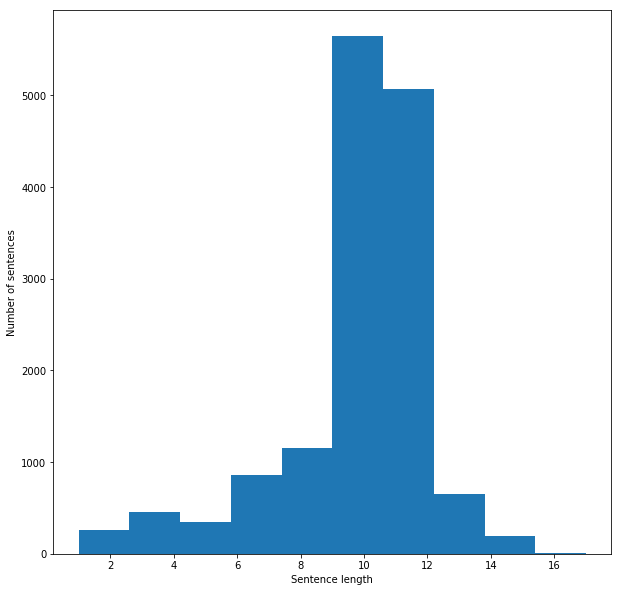

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [109]:
all_words

['what',
 'said',
 'plus',
 'you',
 'have',
 'added',
 'commercials',
 'to',
 'the',
 'experien',
 '...',
 'i',
 'did',
 'not',
 'today',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'an',
 '...',
 'it',
 'is',
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 '"',
 'en',
 '...',
 'and',
 'it',
 'is',
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 '30',
 'a',
 'flight',
 'for',
 'seats',
 'th',
 '...',
 'yes',
 ',',
 'nearly',
 'every',
 'time',
 'i',
 'fly',
 'vx',
 'this',
 'ear',
 'wor',
 '...',
 'really',
 'missed',
 'a',
 'prime',
 'opportunity',
 'for',
 'men',
 'wit',
 '...',
 'well',
 ',',
 'i',
 'did',
 'not',
 'but',
 'now',
 'i',
 'do',
 '!',
 'd',
 'it',
 'was',
 'amazing',
 ',',
 'and',
 'arrived',
 'an',
 'hour',
 'early',
 'yo',
 '...',
 'did',
 'you',
 'know',
 'that',
 'suicide',
 'is',
 'the',
 'second',
 'leadi',
 '...',
 'i',
 'lt',
 '3',
 'pretty',
 'graphics',
 'so',
 'much',
 'better',
 'than',
 '...',
 '

In [130]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemma=[wordnet_lemmatizer.lemmatize(word, pos="v") for word in all_words]


In [131]:
lemma

['what',
 'say',
 'plus',
 'you',
 'have',
 'add',
 'commercials',
 'to',
 'the',
 'experien',
 '...',
 'i',
 'do',
 'not',
 'today',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'an',
 '...',
 'it',
 'be',
 'really',
 'aggressive',
 'to',
 'blast',
 'obnoxious',
 '"',
 'en',
 '...',
 'and',
 'it',
 'be',
 'a',
 'really',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'seriously',
 'would',
 'pay',
 '30',
 'a',
 'flight',
 'for',
 'seat',
 'th',
 '...',
 'yes',
 ',',
 'nearly',
 'every',
 'time',
 'i',
 'fly',
 'vx',
 'this',
 'ear',
 'wor',
 '...',
 'really',
 'miss',
 'a',
 'prime',
 'opportunity',
 'for',
 'men',
 'wit',
 '...',
 'well',
 ',',
 'i',
 'do',
 'not',
 'but',
 'now',
 'i',
 'do',
 '!',
 'd',
 'it',
 'be',
 'amaze',
 ',',
 'and',
 'arrive',
 'an',
 'hour',
 'early',
 'yo',
 '...',
 'do',
 'you',
 'know',
 'that',
 'suicide',
 'be',
 'the',
 'second',
 'leadi',
 '...',
 'i',
 'lt',
 '3',
 'pretty',
 'graphics',
 'so',
 'much',
 'better',
 'than',
 '...',
 'this',
 'be',

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(dataa):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(dataa)

    return emb, count_vectorizer

list_corpus = data["new"].tolist()
list_labels = data["airline_sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

AttributeError: 'list' object has no attribute 'shape'

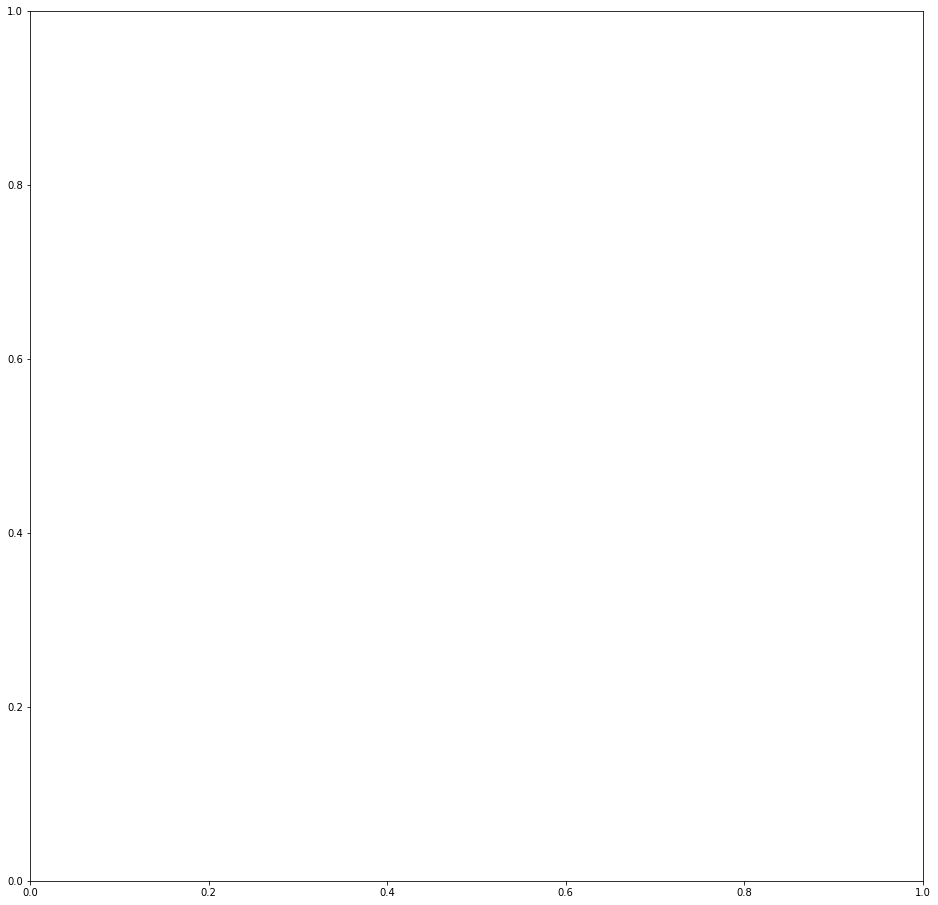

In [138]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [139]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [140]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             

    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    

    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    

    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.681, precision = 0.702, recall = 0.681, f1 = 0.689


In [142]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

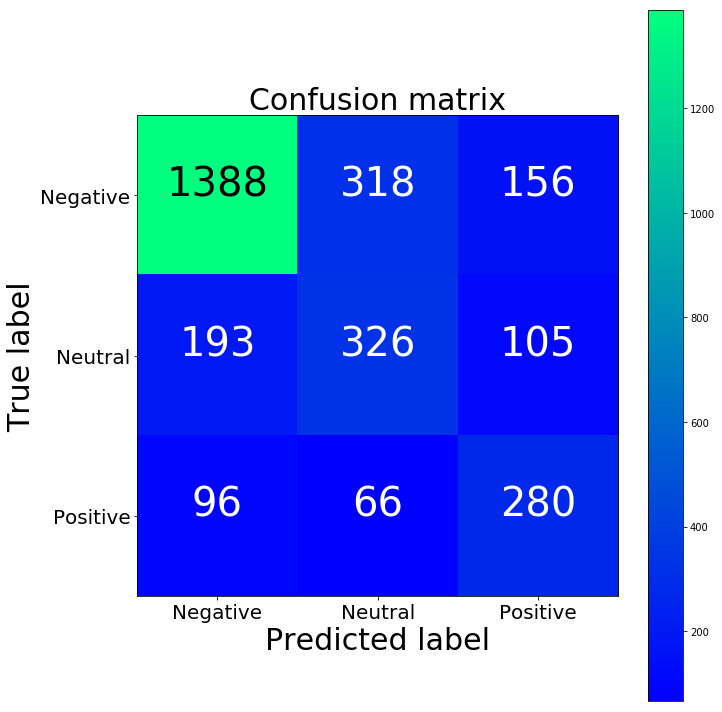

[[1388  318  156]
 [ 193  326  105]
 [  96   66  280]]


In [144]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [152]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    

    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

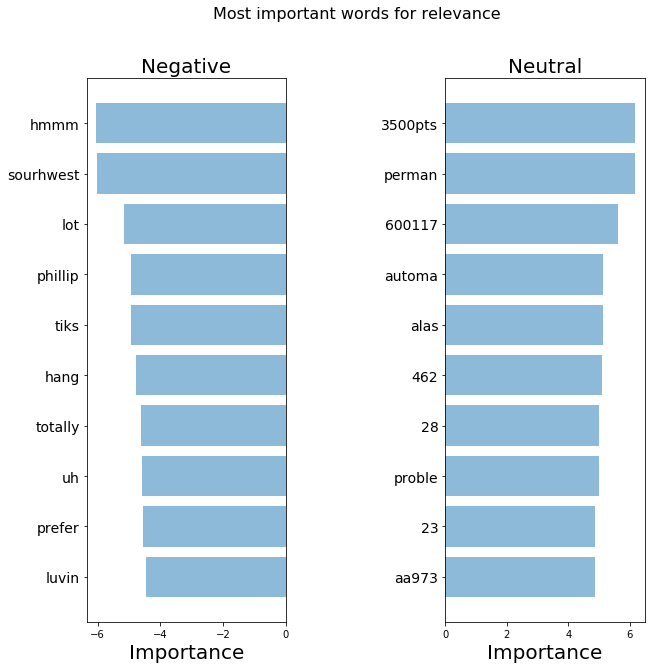

In [153]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Neutral', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")
